In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()


Dataset Shape: (299, 13)

Columns: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [3]:
print(df.isnull().sum())


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [4]:
print(df.iloc[0])
print(df.loc[df['age'] > 75]) 


age                             75.0
anaemia                          0.0
creatinine_phosphokinase       582.0
diabetes                         0.0
ejection_fraction               20.0
high_blood_pressure              1.0
platelets                   265000.0
serum_creatinine                 1.9
serum_sodium                   130.0
sex                              1.0
smoking                          0.0
time                             4.0
DEATH_EVENT                      1.0
Name: 0, dtype: float64
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
5    90.0        1                        47         0                 40   
9    80.0        1                       123         0                 35   
15   82.0        1                       379         0                 50   
16   87.0        1                       149         0                 38   
25   80.0        0                       148         1                 38   
26   95.0        1               

In [5]:
df_sorted = df.sort_values(by='age', ascending=False)
grouped_by_death = df.groupby('DEATH_EVENT').mean()
grouped_by_death[['age', 'ejection_fraction', 'serum_creatinine']]


,age,ejection_fraction,serum_creatinine
DEATH_EVENT,,,
0,58.761906,40.26601,1.184877
1,65.215281,33.46875,1.835833


In [6]:
pd.crosstab(df['sex'], df['DEATH_EVENT'], normalize='index')


DEATH_EVENT,0,1
sex,,
0,0.676190,0.323810
1,0.680412,0.319588


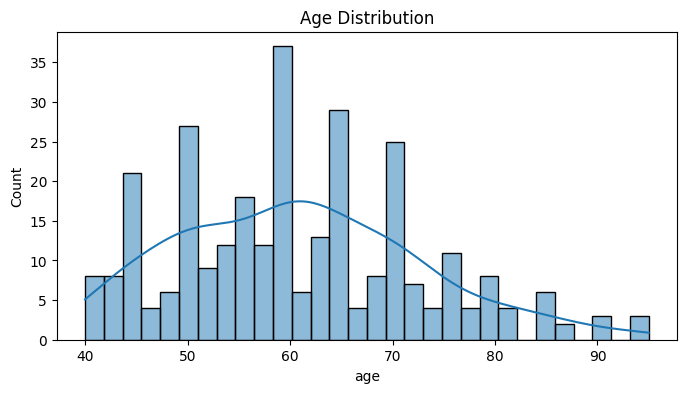

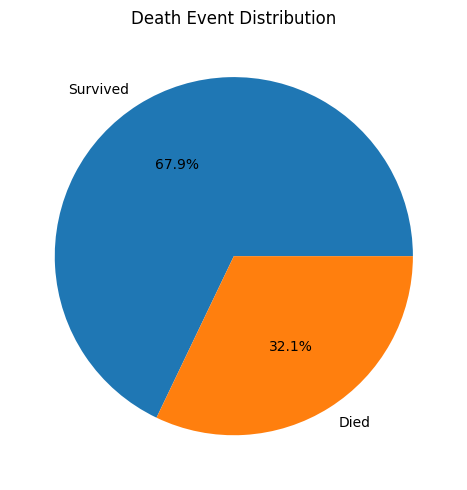

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')

plt.figure(figsize=(5,5))
df['DEATH_EVENT'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Survived', 'Died'])
plt.title('Death Event Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Ejection Fraction vs Survival Status')

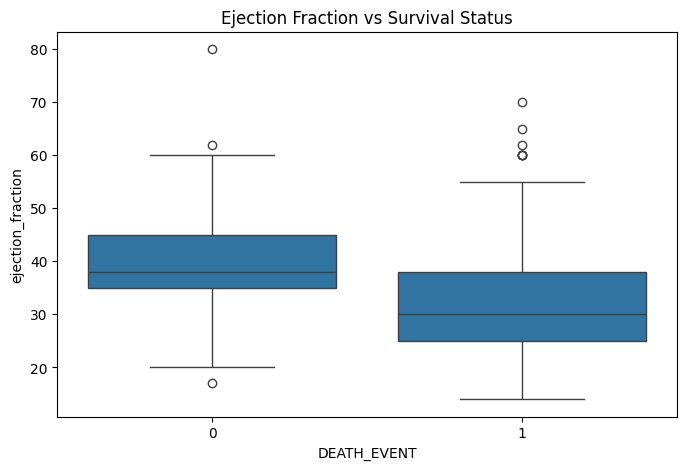

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)
plt.title('Ejection Fraction vs Survival Status')


Text(0.5, 1.0, 'Age vs Serum Creatinine by Death Event')

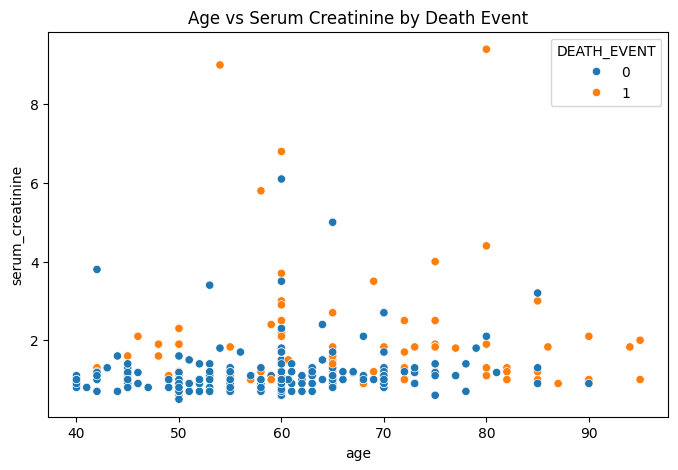

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='serum_creatinine', hue='DEATH_EVENT')
plt.title('Age vs Serum Creatinine by Death Event')


/tmp/ipykernel_12304/3189621078.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby('age_group')['DEATH_EVENT'].mean()


Text(0, 0.5, 'Death Rate')

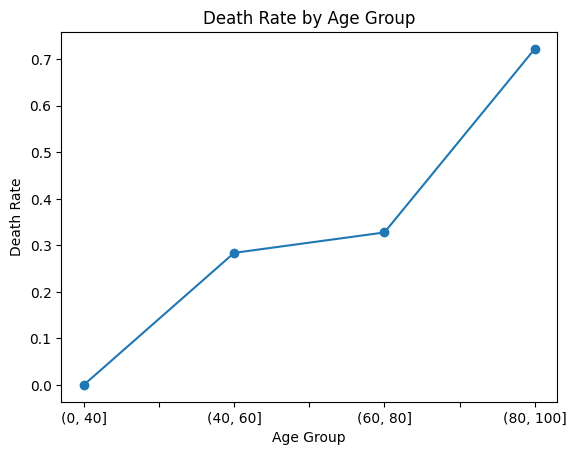

In [10]:
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 60, 80, 100])
survival_by_age = df.groupby('age_group')['DEATH_EVENT'].mean()

survival_by_age.plot(kind='line', marker='o')
plt.title('Death Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Death Rate')


In [12]:
print("Summary Statistics:")
print(df.describe())

high_risk = df[(df['serum_creatinine'] > 1.5) & (df['ejection_fraction'] < 30)]
print("\nHigh Risk Patients (Low EF & High Creatinine):", high_risk.shape[0])


Summary Statistics:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.00